In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv("housing/housing/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


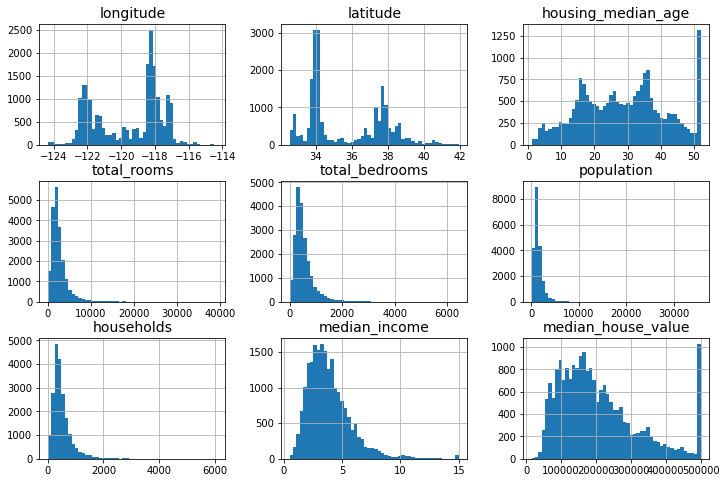

In [6]:
plt.rc('font',size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


housing.hist(bins=50,figsize=(12,8))
plt.show()

In [7]:
housing["income_cat"]=pd.cut(housing["median_income"],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])

<AxesSubplot:>

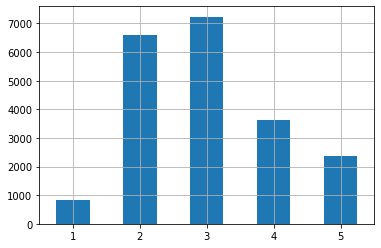

In [8]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0,grid=True)

In [9]:
from sklearn.model_selection import train_test_split
strat_train_set,strat_test_set=train_test_split(housing,test_size=0.2,stratify=housing["income_cat"],random_state=42)

In [10]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",inplace=True,axis=1)

In [11]:
housing=strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

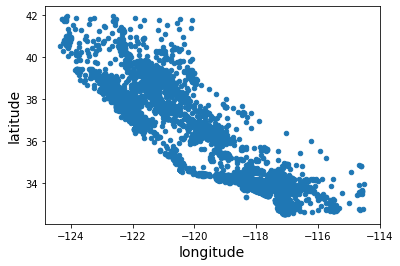

In [12]:
housing.plot(kind="scatter" ,x="longitude",y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

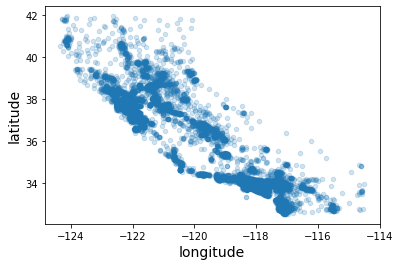

In [13]:
housing.plot(kind="scatter" ,x="longitude",y="latitude", alpha=0.2)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

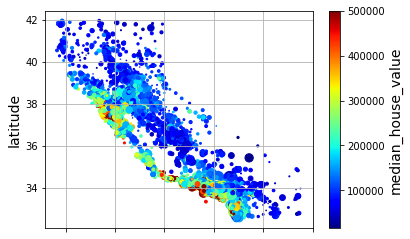

In [14]:
housing.plot(kind="scatter",x="longitude",y="latitude",grid=True,s=housing["population"]/100,c="median_house_value",cmap="jet",colorbar=True,legend=True)

In [15]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

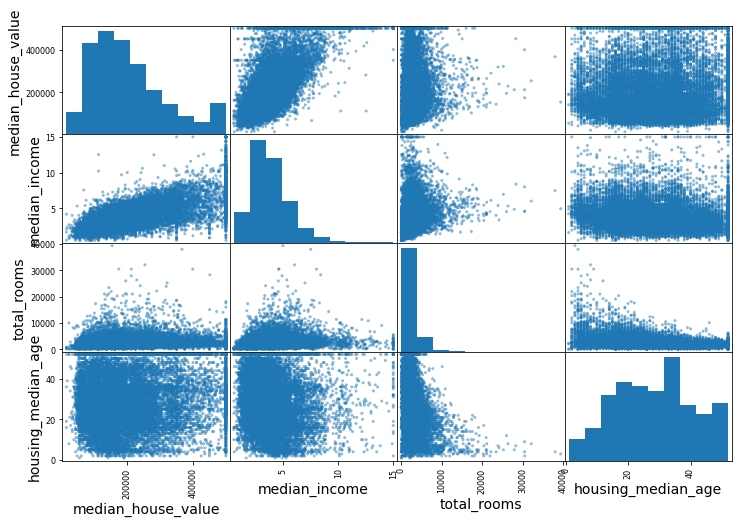

In [16]:
from pandas.plotting import scatter_matrix
attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

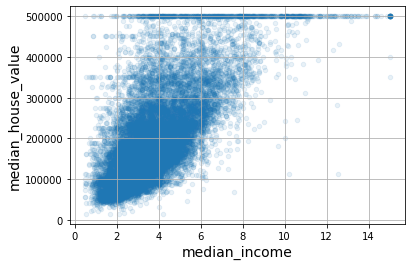

In [17]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1,grid=True)
plt.show()

In [18]:
housing["rooms_per_house"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_ratio"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["people_per_house"]=housing["population"]/housing["households"]

In [19]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

In [20]:
housing=strat_train_set.drop("median_house_value",axis=1)
housing_labels=strat_train_set["median_house_value"].copy()

In [21]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy="median")
housing_num=housing.select_dtypes([np.number])
impute.fit(housing_num)

SimpleImputer(strategy='median')

In [22]:
impute.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [23]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [24]:
x=impute.transform(housing_num)
housing_tr=pd.DataFrame(x,columns=housing_num.columns,index=housing_num.index)

In [25]:
housing.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [26]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False)
housing_cat=encoder.fit_transform(housing[["ocean_proximity"]])

In [27]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})

In [28]:
encoder.handle_unknown="False"

In [29]:
encoder.transform(df_test_unknown)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [30]:
encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [31]:
encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [32]:
test_cat=pd.DataFrame(encoder.transform(df_test_unknown),columns=encoder.get_feature_names_out())

In [33]:
test_cat

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


In [34]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
housing_scaled=std_scaler.fit_transform(housing_tr)

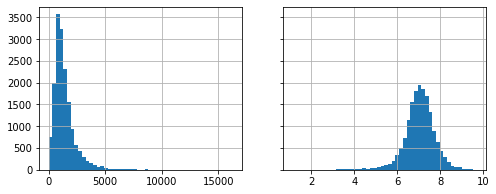

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0],bins=50)
housing["population"].apply(np.log).hist(ax=axs[1],bins=50)
plt.show()

In [36]:
from sklearn.linear_model import LinearRegression

scaler=StandardScaler()
scaled_lables=scaler.fit_transform(housing_labels.to_frame())
linear=LinearRegression()
linear.fit(housing[["median_income"]],scaled_lables)

somePredict=linear.predict(housing[["median_income"]].iloc[:5])

prediciton=scaler.inverse_transform(somePredict)
prediciton

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

In [37]:
from sklearn.compose import TransformedTargetRegressor

linear=TransformedTargetRegressor(LinearRegression(),
                          transformer=StandardScaler())
linear.fit(housing[["median_income"]],housing_labels.to_frame())

prediction=linear.predict(housing[["median_income"]].iloc[:5])
prediction

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

In [38]:
from sklearn.preprocessing import FunctionTransformer

logTransfomer=FunctionTransformer(np.log,inverse_func=np.exp)
pd.DataFrame(logTransfomer.transform(housing[["population"]])).describe()

,population
count,16512.000000
mean,7.025856
std,0.737131
min,1.098612
25%,6.668228
50%,7.062192
75%,7.453562
max,9.699227


In [39]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array,check_is_fitted

class StandardScalarClone(BaseEstimator,TransformerMixin):
    def __init__(self,with_mean=True):
        self.with_mean=with_mean
        
    def fit(self,X,y=None):
        X=check_array(X)
        self.mean_=X.mean(axis=0)
        self.scale_=X.std(axis=0)
        self.n_features_in_=X.shape[0]
        return self
    
    def transform(self,X):
        check_is_fitted(self)
        X=check_array(X)
        assert self.n_features_in_==X.shape[0]
        if self.with_mean:
            X=X-self.mean_
        return X/self.scale_

In [40]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [41]:
cluster=ClusterSimilarity(n_clusters=10,gamma=1.,random_state=42)
simi=cluster.fit_transform(housing[["latitude","longitude"]])

In [42]:
simi[:3].round(2)

array([[0.  , 0.97, 0.  , 0.  , 0.  , 0.08, 0.  , 0.  , 0.13, 0.57],
       [0.12, 0.  , 0.98, 0.03, 0.  , 0.  , 0.  , 0.54, 0.  , 0.  ],
       [0.  , 0.75, 0.  , 0.  , 0.  , 0.44, 0.  , 0.  , 0.27, 0.28]])

In [43]:
from sklearn.pipeline import make_pipeline

num_pipeline=make_pipeline(SimpleImputer(strategy="median"),StandardScaler())
pre_num=num_pipeline.fit_transform(housing_num)

In [44]:
pre_num[:5]

array([[-1.42303652,  1.0136059 ,  1.86111875,  0.31191221,  1.36816703,
         0.13746004,  1.39481249, -0.93649149],
       [ 0.59639445, -0.702103  ,  0.90762971, -0.30861991, -0.43592476,
        -0.69377062, -0.37348471,  1.17194198],
       [-1.2030985 ,  1.27611874,  0.35142777, -0.71224036, -0.76070869,
        -0.78876841, -0.77572662, -0.75978881],
       [ 1.23121557, -0.88492444, -0.91989094,  0.70226169,  0.74230601,
         0.38317548,  0.73137454, -0.85028088],
       [ 0.71136206, -0.87554898,  0.58980003,  0.79012465,  1.59575285,
         0.44437597,  1.75526303, -0.18036472]])

In [45]:
num_pipeline.get_feature_names_out()

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [46]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
"total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
SimpleImputer(strategy="most_frequent"),
OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", cat_pipeline, cat_attribs),
])

In [47]:
house_pre=preprocessing.fit_transform(housing)
preprocessing.get_feature_names_out()

array(['num__longitude', 'num__latitude', 'num__housing_median_age',
       'num__total_rooms', 'num__total_bedrooms', 'num__population',
       'num__households', 'num__median_income',
       'cat__ocean_proximity_<1H OCEAN', 'cat__ocean_proximity_INLAND',
       'cat__ocean_proximity_ISLAND', 'cat__ocean_proximity_NEAR BAY',
       'cat__ocean_proximity_NEAR OCEAN'], dtype=object)

In [48]:
housing_preDf=pd.DataFrame(house_pre,columns=preprocessing.get_feature_names_out())

In [49]:
housing_preDf

,num__longitude,num__latitude,num__housing_median_age,num__total_rooms,num__total_bedrooms,num__population,num__households,num__median_income,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN
0,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
1,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0
2,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,0.0,1.0,0.0,0.0,0.0
3,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,0.0,1.0,0.0,0.0,0.0
4,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041,1.0,0.0,0.0,0.0,0.0
16508,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630,0.0,1.0,0.0,0.0,0.0
16509,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049,0.0,0.0,0.0,0.0,1.0
16510,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396,1.0,0.0,0.0,0.0,0.0


In [50]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing=make_column_transformer((num_pipeline,make_column_selector(dtype_include=np.number)),
                                     (cat_pipeline,make_column_selector(dtype_include=object))
                                     )

In [51]:
house_pre=preprocessing.fit_transform(housing)
housing_preDf=pd.DataFrame(house_pre,columns=preprocessing.get_feature_names_out())
housing_preDf

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
0,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
1,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0
2,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,0.0,1.0,0.0,0.0,0.0
3,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,0.0,1.0,0.0,0.0,0.0
4,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041,1.0,0.0,0.0,0.0,0.0
16508,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630,0.0,1.0,0.0,0.0,0.0
16509,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049,0.0,0.0,0.0,0.0,1.0
16510,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396,1.0,0.0,0.0,0.0,0.0


In [52]:
def ratio(X):
    return X[:,[0]]/X[:,[1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]

def ratio_pipeline():
    return make_pipeline(SimpleImputer(strategy="median"),
                         FunctionTransformer(ratio,feature_names_out=ratio_name),
                              StandardScaler())

log_pipeline=make_pipeline(SimpleImputer(strategy="median"),
                          FunctionTransformer(np.log,feature_names_out="one-to-one"),
                          StandardScaler())
# cluster=ClusterSimi(n_cluster=10,random_state=42)
default_num_pipeline=make_pipeline(SimpleImputer(strategy="median"),
                                  StandardScaler())

preprocessing=ColumnTransformer([
("bedrooms",ratio_pipeline(),["total_bedrooms","total_rooms"]),                    
("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
("people_per_house", ratio_pipeline(), ["population", "households"]),
("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
"households", "median_income"]),
("geo", cluster, ["latitude", "longitude"]),
("cat", cat_pipeline, make_column_selector(dtype_include=object)),
],
remainder=default_num_pipeline)

In [53]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [54]:
housing_prepared=preprocessing.fit_transform(housing)

In [55]:
from sklearn.linear_model import LinearRegression

lin_reg=make_pipeline(preprocessing,LinearRegression())
lin_reg.fit(housing,housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000017A2B75BA90>)])),
                ('linearregression', LinearRegression())])

In [56]:
housing_pred=lin_reg.predict(housing)
housing_pred[:5]

array([242761.81285712, 375862.7850295 , 127480.98273406,  99355.30257635,
       324610.74224191])

In [57]:
housing_labels[:5]

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
Name: median_house_value, dtype: float64

In [58]:
from sklearn.metrics import root_mean_squared_error

lin_rmse=root_mean_squared_error(housing_labels,housing_pred)
lin_rmse

68647.95686706669

In [59]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=make_pipeline(preprocessing,DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing,housing_labels)
housing_pred=tree_reg.predict(housing)
tree_rmse=root_mean_squared_error(housing_labels,housing_pred)
tree_rmse

0.0

In [60]:
from sklearn.model_selection import cross_val_score

tree_rmse=-cross_val_score(tree_reg,housing,housing_labels,scoring="neg_root_mean_squared_error",cv=10)
tree_rmse

array([66343.67404108, 63925.25310602, 66874.84912025, 66716.81062178,
       65930.10085465, 70664.63583294, 66933.74083972, 68454.11092405,
       69693.52916464, 65996.47822622])

In [61]:
pd.Series(tree_rmse).describe()

count       10.000000
mean     67153.318273
std       1963.580924
min      63925.253106
25%      66083.277180
50%      66795.829871
75%      68074.018403
max      70664.635833
dtype: float64

In [62]:
from sklearn.ensemble import RandomForestRegressor

for_reg=make_pipeline(preprocessing,RandomForestRegressor())
for_rmse=-cross_val_score(for_reg,housing,housing_labels,scoring="neg_root_mean_squared_error",cv=2)

for_rmse

array([48155.87664936, 49327.77570145])

In [63]:
pd.Series(for_rmse).describe()

count        2.000000
mean     48741.826175
std        828.657767
min      48155.876649
25%      48448.851412
50%      48741.826175
75%      49034.800938
max      49327.775701
dtype: float64

In [64]:
for_reg.fit(housing,housing_labels)
housing_pred=for_reg.predict(housing)

In [65]:
rmse=root_mean_squared_error(housing_labels,housing_pred)
rmse

17505.914980754435

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

full_pipeline=Pipeline([
    ("preprocessing",preprocessing),
    ("random_forest",RandomForestRegressor())
])


param_grid = [
{'preprocessing__geo__n_clusters': [5, 8, 10],
'random_forest__max_features': [4, 6, 8]},
{'preprocessing__geo__n_clusters': [10, 15],
'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

In [ ]:
grid_search.best_params_

In [ ]:
X_test=strat_test_set.drop(["median_house_value"],axis=1)
y_test=strat_test_set["median_house_value"].copy()

final_model=grid_search.best_estimator_
final_prediction=final_model.predict(X_test)

In [ ]:
rmse=root_mean_squared_error(y_test,final_prediction)
rmse

In [ ]:
final_model.score(X_test,y_test)